# AI-Vive Banking Exploratory Data Analysis

In [1]:
import sqlite3
file_loc = 'data/bmarket.db'

conn = sqlite3.connect(file_loc)
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

if tables:
  table_name = tables[0][0]  # Assuming there's at least one table
  print(f"Table Name: {table_name}")

  cursor.execute(f"SELECT * FROM {table_name} LIMIT 5")
  rows = cursor.fetchall()

  if rows:
    # Get column names
    cursor.execute(f"PRAGMA table_info({table_name})")
    column_names = [i[1] for i in cursor.fetchall()]

    print("Column Headers:", column_names)
    for row in rows:
      print(row)

  else:
    print("No data found in the table.")
else:
  print("No tables found in the database.")

Table Name: bank_marketing
Column Headers: ['Client ID', 'Age', 'Occupation', 'Marital Status', 'Education Level', 'Credit Default', 'Housing Loan', 'Personal Loan', 'Contact Method', 'Campaign Calls', 'Previous Contact Days', 'Subscription Status']
(32885, '57 years', 'technician', 'married', 'high.school', 'no', 'no', 'yes', 'Cell', 1, 999, 'no')
(3170, '55 years', 'unknown', 'married', 'unknown', 'unknown', 'yes', 'no', 'telephone', 2, 999, 'no')
(32207, '33 years', 'blue-collar', 'married', 'basic.9y', 'no', 'no', 'no', 'cellular', 1, 999, 'no')
(9404, '36 years', 'admin.', 'married', 'high.school', 'no', 'no', 'no', 'Telephone', 4, 999, 'no')
(14021, '27 years', 'housemaid', 'married', 'high.school', 'no', None, 'no', 'Cell', 2, 999, 'no')


In [2]:
import numpy as np
import pandas as pd

#Read data into pandas
bank_df = pd.read_sql_query("SELECT * FROM bank_marketing", conn)
conn.close() # Close connection as no longer needed.

print(bank_df.head()) # Check if table is set as dataframe

   Client ID       Age   Occupation Marital Status Education Level  \
0      32885  57 years   technician        married     high.school   
1       3170  55 years      unknown        married         unknown   
2      32207  33 years  blue-collar        married        basic.9y   
3       9404  36 years       admin.        married     high.school   
4      14021  27 years    housemaid        married     high.school   

  Credit Default Housing Loan Personal Loan Contact Method  Campaign Calls  \
0             no           no           yes           Cell               1   
1        unknown          yes            no      telephone               2   
2             no           no            no       cellular               1   
3             no           no            no      Telephone               4   
4             no         None            no           Cell               2   

   Previous Contact Days Subscription Status  
0                    999                  no  
1               

In [3]:
print(bank_df.count())
print(bank_df.dtypes)

# Checks for oddities in the string values
print("Age:", bank_df['Age'].unique())
print("Occupation:", bank_df['Occupation'].unique())
print("Marital Status:", bank_df['Marital Status'].unique())
print("Education Level:", bank_df['Education Level'].unique())
print("Credit Default:", bank_df['Credit Default'].unique())
print("Housing Loan:", bank_df['Housing Loan'].unique())
print("Personal Loan:", bank_df['Personal Loan'].unique())
print("Contact Method:", bank_df['Contact Method'].unique())
print("Campaign Calls:", bank_df['Campaign Calls'].unique())
print("Previous Contact Days:", bank_df['Previous Contact Days'].unique())
print("Subscription Status:", bank_df['Subscription Status'].unique())

Client ID                41188
Age                      41188
Occupation               41188
Marital Status           41188
Education Level          41188
Credit Default           41188
Housing Loan             16399
Personal Loan            37042
Contact Method           41188
Campaign Calls           41188
Previous Contact Days    41188
Subscription Status      41188
dtype: int64
Client ID                 int64
Age                      object
Occupation               object
Marital Status           object
Education Level          object
Credit Default           object
Housing Loan             object
Personal Loan            object
Contact Method           object
Campaign Calls            int64
Previous Contact Days     int64
Subscription Status      object
dtype: object
Age: ['57 years' '55 years' '33 years' '36 years' '27 years' '58 years'
 '48 years' '150 years' '24 years' '34 years' '42 years' '43 years'
 '26 years' '37 years' '46 years' '59 years' '49 years' '30 years'
 '51 years

In [4]:
print("Occupation = 'unknown' count:", (bank_df['Occupation'] == 'unknown').sum())
print("Age = '150 years' count:", (bank_df['Age'] == '150 years').sum())
print("Marital Status = 'unknown' count:", (bank_df['Marital Status'] == 'unknown').sum())
print("Education Level = 'unknown' count:", (bank_df['Education Level'] == 'unknown').sum())
print("Credit Default = 'unknown' count:", (bank_df['Credit Default'] == 'unknown').sum())
print("Campaign Calls <= -1 count:", (bank_df['Campaign Calls'] <= -1).sum())
print("Previous Contact Days = 0 or = 999 count:", bank_df['Previous Contact Days'].isin([0, 999]).sum() )
print("Previous Contact Days = 0 count:", bank_df['Previous Contact Days'].isin([0]).sum() )
print("Previous Contact Days = 999 count:", bank_df['Previous Contact Days'].isin([999]).sum() )

Occupation = 'unknown' count: 330
Age = '150 years' count: 4197
Marital Status = 'unknown' count: 80
Education Level = 'unknown' count: 1731
Credit Default = 'unknown' count: 8597
Campaign Calls <= -1 count: 4153
Previous Contact Days = 0 or = 999 count: 39688
Previous Contact Days = 0 count: 15
Previous Contact Days = 999 count: 39673


## Preliminary Datatype Analysis:

**Client ID:** Int64. Valid data type, but should be dropped as not useful for training.  

**Age:** Object, presumably string. Will need to clean column to change to integer. One value of 150 years is nonsensical (the oldest recorded ever living human as of 2025 is Jeanne Calment, who lived for 122 years). However, it compromises of nearly 10% of all records.  
*This implies a glitch in the system causing this*. This will either need to be masked, or imputed.

**Occupation:** Object, presumably string. Unknown fields may be imputed, treated as their own category,  or data masked.  

**Marital Status:** Object, presumably string. One-hot encoding to be done. Unknown fields may be imputed, treated as their own category, or data masked.  

**Education Level:** Object, presumably string. One-hot-encoding to be done. Unknown fields may be imputed, treated as their own category, or data masked.  

**Credit Default:** Object, presumably string. One-hot-encoding to be done. Greater than 25% of records are Unknown/None fields, they will be treated as their own category or have their data masked.  

**Housing Loan:** Object, presumably string. One-hot-encoding to be done. Greater than 25% of records are Unknown/None fields, they will be treated as their own category or have their data masked.    

**Personal Loan:** Object, presumably string. One-hot-encoding to be done. Greater than 25% of records are Unknown/None fields, they will be treated as their own category or have their data masked.  

**Contact Method:** Object, presumably string. One-hot-encoding to be done, and standardisation for 'cell' and 'telephone' and its variants will need to be done.  

**Campaign Calls:** Integer. Some negative values, which make zero sense. Will consider either flipping all negative values to positive values, or data masking.  

**Previous Contact Days:** Integer. Both 0 and 999 exist as values. Data description says that 999 means no previous contact. Will standardise by replacing all 0 values with 999.  

**Subscription Status:** 'Yes' and 'No'. Labels. Will convert to 0 and 1.

## Exploratory Data Analysis

We will perform some exploratory data analysis, cleaning some of the data for better presentation, with the assumptions of data cleaning included with each graph.

Age Data Before Imputation

count    41188.000000
mean        51.231572
std         34.708486
min         17.000000
25%         33.000000
50%         40.000000
75%         51.000000
max        150.000000
Name: Age_Integer, dtype: float64


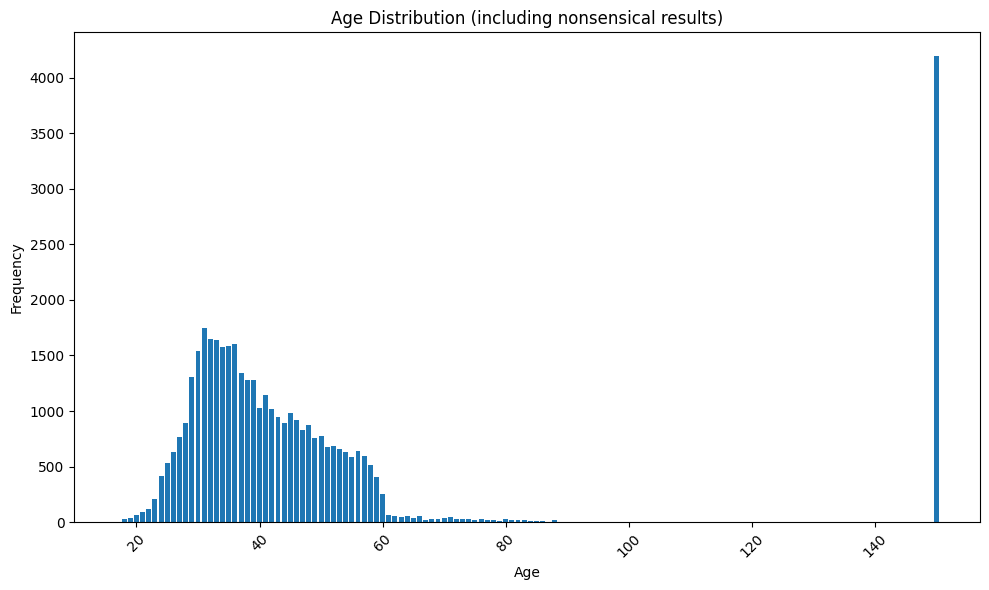

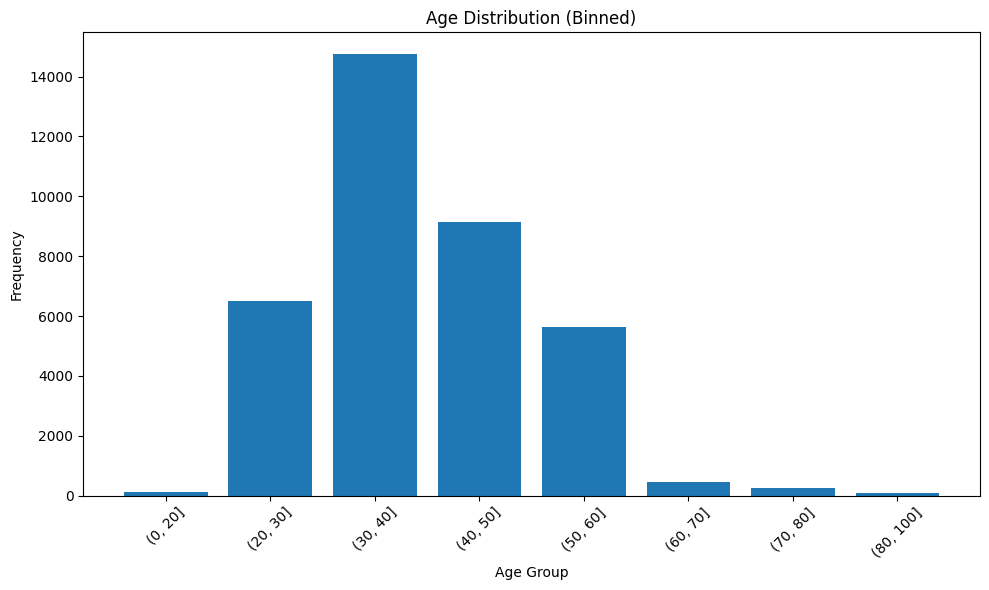

Age Data After Imputation

    Occupation Marital Status Education Level Credit Default Housing Loan  \
0   technician        married     high.school             no           no   
1      unknown        married         unknown        unknown          yes   
2  blue-collar        married        basic.9y             no           no   
3       admin.        married     high.school             no           no   
4    housemaid        married     high.school             no         None   

  Personal Loan Contact Method  Campaign Calls  Previous Contact Days  \
0           yes           Cell               1                    999   
1            no      telephone               2                    999   
2            no       cellular               1                    999   
3            no      Telephone               4                    999   
4            no           Cell               2                    999   

  Subscription Status  Age_Integer  
0                  no         57.0

In [10]:
bank_df_age = bank_df.copy()
bank_df_age["Age_Integer"] = bank_df_age["Age"].str.extract(r'(\d+)').astype(int)

import matplotlib.pyplot as plt

print("Age Data Before Imputation")
print("")
print(bank_df_age["Age_Integer"].describe())

# Count frequency of each age
age_counts = bank_df_age["Age_Integer"].value_counts().sort_index()

# Plot as bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution (including nonsensical results)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

bank_df_age['Age Bin'] = pd.cut(bank_df_age['Age_Integer'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 100])
age_bin_counts = bank_df_age['Age Bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_bin_counts.index.astype(str), age_bin_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Distribution (Binned)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Age Data After Imputation")
print("")

print(bank_df_age.head())

# Imputing using KNN Imputer
from sklearn.impute import KNNImputer

bank_df_age.loc[bank_df_age["Age_Integer"] > 100, 'Age_Integer'] = np.nan
bank_df_age.drop('Age', axis=1, inplace=True)
bank_df_age.drop('Age Bin', axis=1, inplace=True)
bank_df_age.drop('Client ID', axis=1, inplace=True)

# Other fields are also cleaned up first, no imputation done
#bank_df_age.loc[bank_df_age

imputer = KNNImputer(n_neighbors=3)


## Data Cleaning and Preparation

3 Models are planned. A Decision Tree Classifier, an XGBoost Classifier, and a PyTorch deep model.

Technically, a Decision Tree Regressor will be used, to allow for the implementation of soft labels. This only will work as this is a binary classification problem. The PyTorch model will also use soft labels

The data for each type of model will need to be prepared differently, including two types of handling of missing data. One is to impute, and the other is to mask or mark as a new category of 'unknown'.

In [6]:
bank_df_to_clean = bank_df.copy()

# Decision Tree Dataset

